# Numerical Integration of a Given Function

Suppose we have a function $f(x)$ that we want to integrate. For example, $f(x) = \sin(x)$, to be integrated from $0$ to $\pi$. The result should be
\begin{equation}
\int_{0}^{\pi} \sin(x) dx = - \cos(x) \Big|_{0}^{\pi} = 2
\end{equation}
In the following we will evaluate the integral numerically. Let us first define the function and plot it.

In [1]:
import numpy as np

def func(x):
    f = np.sin(x)    # we have to import the sin function from the numpy package
    return f

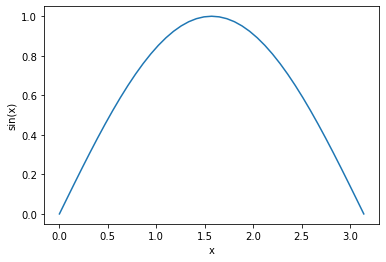

In [2]:
import matplotlib.pyplot as plt

N = 40    # number of partitions in the range [0, pi]
x_array = np.linspace(0, np.pi, N+1)    # this function uniformly partitions a range and returns an array
f_array = func(x_array)    # numpy functions can act on arrays directly

plt.figure()
plt.plot(x_array, f_array)
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.show()

## Integrate using Riemann Sum

The integral of the function is the area under the curve. We can integrate the function by partitioning the x-axis into small segments and approximating the area within each partition as a rectangle. Then the total area is approximated by the sum of all rectangle areas.

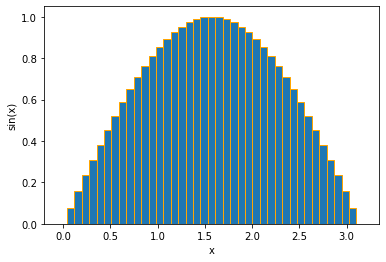

In [3]:
dx = np.pi / N

plt.figure()
#plt.plot(x_array, f_array)
plt.bar(x_array, f_array, width=dx, edgecolor='orange')    # make bar plot
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.show()

In [4]:
Riemann_sum = np.sum(f_array * dx)
print(f'Total area = {Riemann_sum}')

Total area = 1.998971810497066


If we increase the number of partitions, `N`, we can improve the precision of the numerical integration. To see this, let us define a function that basically carries out the steps we did above, but with `N` as a parameter.

In [5]:
def sum_over_N_part(N):
    """
    Define a python function to do the integral using N partitions.
    Input:
    N: int, number of partitions.
    Output:
    Riemann_sum: float, value of integral as given by Riemann sum.
    """
    x_array = np.linspace(0, np.pi, N+1)
    f_array = func(x_array)
    dx = np.pi / N
    Riemann_sum = np.sum(f_array * dx)
    return Riemann_sum

First check if we can reproduce our result above:

In [6]:
sum_over_N_part(40)

1.998971810497066

Now try a bigger N:

In [7]:
sum_over_N_part(100)

1.9998355038874436

In fact, we can see better by plotting the result with respect to N:

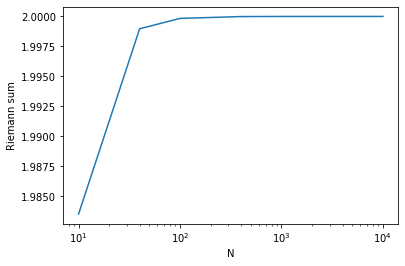

In [8]:
N_array = [10, 40, 100, 400, 1000, 4000, 10000]
sum_array = []
for N in N_array:
    s = sum_over_N_part(N)
    sum_array.append(s)
# sum_array = [sum_over_N_part(N) for N in N_array]    # alternatively, can use python style "list comprehension"

plt.figure()
plt.plot(N_array, sum_array)
plt.xscale('log')
plt.xlabel('N')
plt.ylabel('Riemann sum')
plt.show()

Let us check how fast the numerical result converges to the right answer:

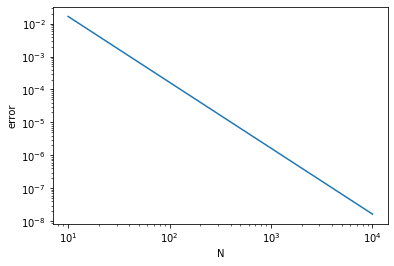

In [9]:
err_array = np.abs(2 - np.array(sum_array))

plt.figure()
plt.plot(N_array, err_array)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('N')
plt.ylabel('error')
plt.show()

The above figure shows that the numerical integration converges to the right answer quadratically, i.e., error $\propto N^{-2}$.

## Integrate using Monte Carlo

An alternative, perhaps amusing, method for doing the integral is to use the "Monte Carlo" method. Monte Carlo generally refers to numerical methods that rely on using (pseudo)random numbers. In our case, we will generate random numbers to help us estimate the area under the curve.

The idea is to look at a box that contains the curve, such as one bounded by $x = 0, \pi$ and $y = 0, 1$. Our goal is to estimate the fraction of area under the curve inside the box. Since we know the total area of the box, $A = \pi$, by evaluating the fraction, we will be able to find the area under the curve. Now the trick is to estimate this fraction using random numbers. Basically, we will toss random points inside the box and count how many happen to lie below the curve.

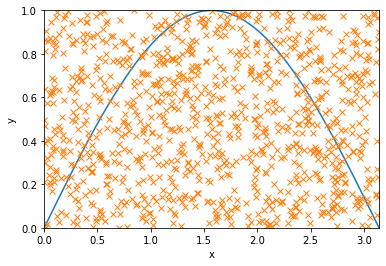

In [10]:
R = 1000    # number of random points

y_coord = np.random.rand(R)    # y coordinates uniformly sampled between 0 and 1
x_coord = np.random.rand(R) * np.pi    # x coordinates uniformly sampled between 0 and pi

plt.figure()
plt.plot(x_array, f_array)    # plotting the curve
plt.plot(x_coord, y_coord, 'x')    # plotting the random points
plt.xlim(0, np.pi)
plt.ylim(0, 1)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [11]:
below_curve = (y_coord < func(x_coord))    # binary array, 1 for True (below curve) and 0 for False (above curve)
count_below = np.sum(below_curve)
print(f'number of points below the curve = {count_below}')

number of points below the curve = 645


In [12]:
fraction = count_below / R
MonteCarlo_area = np.pi * fraction
print(f'Area under curve = {MonteCarlo_area}')

Area under curve = 2.0263272615654166


We may improve the precision by increasing the number of random points, `R`. Let us again define a python function that carries out the steps above, with the number `R` as a parameter:

In [13]:
def estimate_by_R_points(R):
    """
    Define a python function to do the integral using R random points.
    Input:
    R: int, number of random points.
    Output:
    MonteCarlo_area: float, value of integral as given by Monte Carlo method.
    """
    y_coord = np.random.rand(R)
    x_coord = np.random.rand(R) * np.pi
    below_curve = (y_coord < func(x_coord))
    count_below = np.sum(below_curve)
    fraction = count_below / R
    MonteCarlo_area = np.pi * fraction
    return MonteCarlo_area

Let us plot the result with respect to the number R. Since each time we run the function, there will be a different realization of the random points, we should take an average over multiple trials for each R. We will also estimate the error of the estimation by calculating the standard error among the trials.

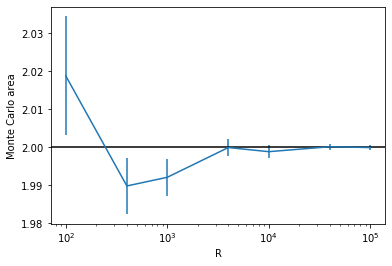

In [14]:
R_array = [100, 400, 1000, 4000, 10000, 40000, 100000]
est_array = []    # list of estimates to be filled
se_array = []    # list of standard errors
trial = 100
for R in R_array:
    res = []
    for t in range(trial):    # for each R, repeat the calculation `trial` times
        mc = estimate_by_R_points(R)
        res.append(mc)    # collect results from the trials in the list `res`
    res_mean = np.mean(res)    # calculate the mean of the trials
    res_se = np.std(res) / np.sqrt(trial)    # standard error = standard deviation / sqrt(#data-points)
    est_array.append(res_mean)
    se_array.append(res_se)

plt.figure()
plt.errorbar(R_array, est_array, yerr=se_array)
plt.axhline(2, color='k')
plt.xscale('log')
plt.xlabel('R')
plt.ylabel('Monte Carlo area')
plt.show()

Now we can see how the error scales with the number of random points:

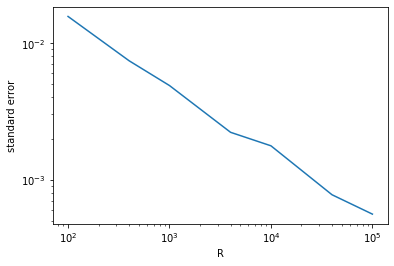

In [15]:
plt.figure()
plt.plot(R_array, se_array)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('R')
plt.ylabel('standard error')
plt.show()

This figure shows that our result converges again quadratically, i.e., error $\propto R^{-2}$.